In [14]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import numpy as np
import pandas as pd
import warnings
from matplotlib import pyplot as plt
from matplotlib.cm import rainbow
import collections
from tqdm import tqdm_notebook as tqdm
import scipy.stats as sps
import pickle

import tensorflow as tf
import tensorflow_probability as tfp
from IPython.display import clear_output

%matplotlib inline


tfd = tfp.distributions

In [55]:
class DataSet:
    
    def __init__(self, count=100, nClasses=10, L=20, scale_a=10, scale_b=100):
        self.alpha0 = sps.expon.rvs(scale=scale_a, size=count)
        self.beta0 = sps.expon.rvs(scale=scale_b, size=count)
        self.p = sps.beta.rvs(self.alpha0, self.beta0, size=(nClasses, count)).T
        self.train_data = sps.binom.rvs(n=L, p=self.p)
        self.val_data = sps.binom.rvs(n=L, p=self.p)
        self.ideal = sps.binom.rvs(n=10 ** 6, p=self.p)
        
def load_data_set(filename):
    with open(filename, 'rb') as input_:
        return pickle.load(input_)
        
def save_data_set(filename, dataset):
    with open(filename, 'wb') as output:
        pickle.dump(dataset, output, pickle.HIGHEST_PROTOCOL)

In [56]:
data_set_small = DataSet(100, 10)
data_set_big = DataSet(100, 100)
data_set_super = DataSet(3, 1000)

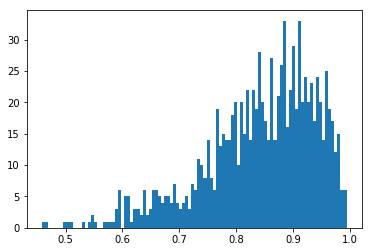

(array([ 6.74872839, 11.12584811, 10.48041208]),
 array([35.71932014,  2.06228157, 54.6968494 ]))

In [60]:
plt.hist(data_set_super.p[1], bins=100)
plt.show()
data_set_super.alpha0, data_set_super.beta0

In [65]:
! mkdir datasets

In [66]:
save_data_set("./datasets/100.10", data_set_small)
save_data_set("./datasets/100.100", data_set_big)